In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [218]:
ssb = pd.read_csv('ssb.csv') #reading in single source brand RX 

In [219]:
print("Top 25 Most Common Singe Service Drugs 2012-18: \n")
print(ssb.NDC_PROD_NAME.value_counts().head(25)) #readin

Top 25 Most Common Singe Service Drugs 2012-18: 

PROAIR HFA                                            482630
ADVAIR DISKUS                                         299895
VENTOLIN HFA                                          253813
VYVANSE                                               222913
FLOVENT HFA                                           141887
LANTUS SOLOSTAR                                       140742
NUVARING                                              123965
SUBOXONE                                              123582
SYMBICORT                                             118602
OXYCONTIN                                             110803
LYRICA                                                103220
SPIRIVA HANDIHALER                                     95798
JANUVIA                                                95725
LANTUS                                                 83806
VICTOZA                                                67929
NOVOLOG FLEXPEN                    

# Single Source Brand Review

In [251]:
ssb['AVG']=ssb['AMT_PAID']/ssb['RX_DAYS_SUPPLY']*365

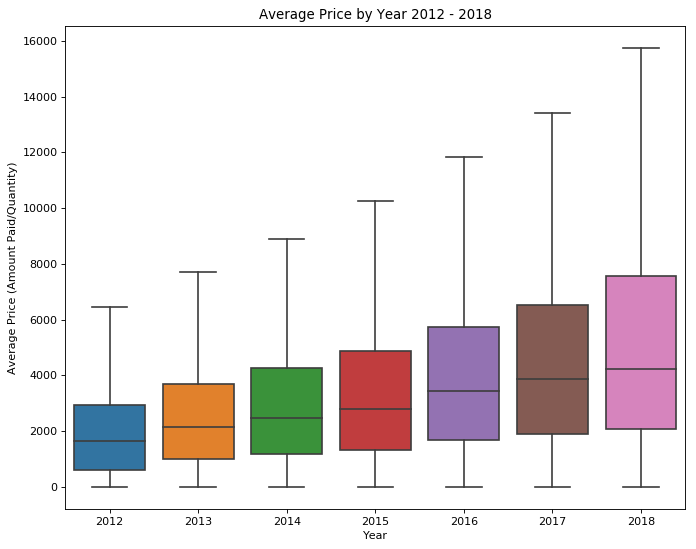

In [222]:
#sns.set(style="ticks")
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=ssb.AVG, x=ssb.FROM_YEAR,showfliers=False)
plt.xlabel('Year')
plt.ylabel('Average Price (Amount Paid/Quantity)')
plt.title('Average Price by Year 2012 - 2018')
plt.show()

# Humira Pen Review

In [223]:
humirapen = ssb[ssb.NDC_PROD_NAME.str.contains('HUMIRA PEN')] #looking at Humira Pen


count     55813.000000
mean       4957.226713
std        3517.781854
min           2.300000
25%        2738.120000
50%        4123.530000
75%        5611.260000
max      105560.100000
Name: AMT_PAID, dtype: float64

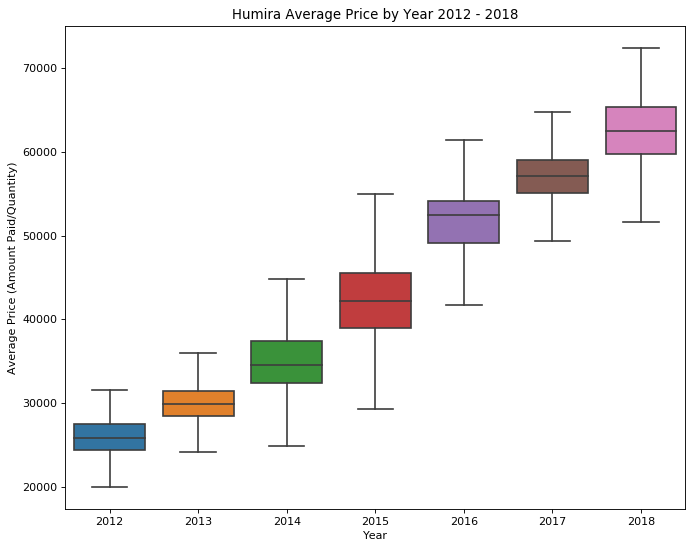

In [224]:
#boxplot removing outliers of humira prices
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=humirapen.AVG, x=humirapen.FROM_YEAR,showfliers=False)
plt.xlabel('Year')
plt.ylabel('Average Price (Amount Paid/Quantity)')
plt.title('Humira Average Price by Year 2012 - 2018')
plt.show()

In [225]:
humirapen=humirapen.dropna(subset=['AVG'])

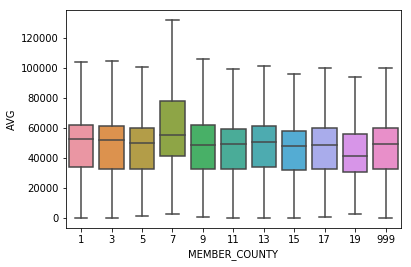

In [226]:
sns.boxplot(y=humirapen.AVG, x=humirapen.MEMBER_COUNTY,showfliers=False)
plt.show()

# Stelara Review

In [227]:
stelara = ssb[ssb.NDC_PROD_NAME.str.contains('STELARA')] #STELARA

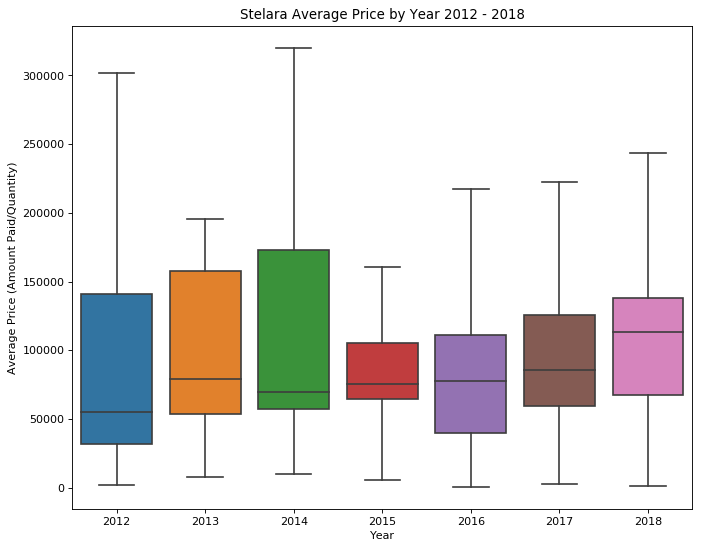

In [228]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=stelara.AVG, x=stelara.FROM_YEAR,showfliers=False)
plt.xlabel('Year')
plt.ylabel('Average Price (Amount Paid/Quantity)')
plt.title('Stelara Average Price by Year 2012 - 2018')
plt.show()

# Xyrem Review

In [229]:
xyrem = ssb[ssb.NDC_PROD_NAME.str.contains('XYREM')] #looking at Xyrem

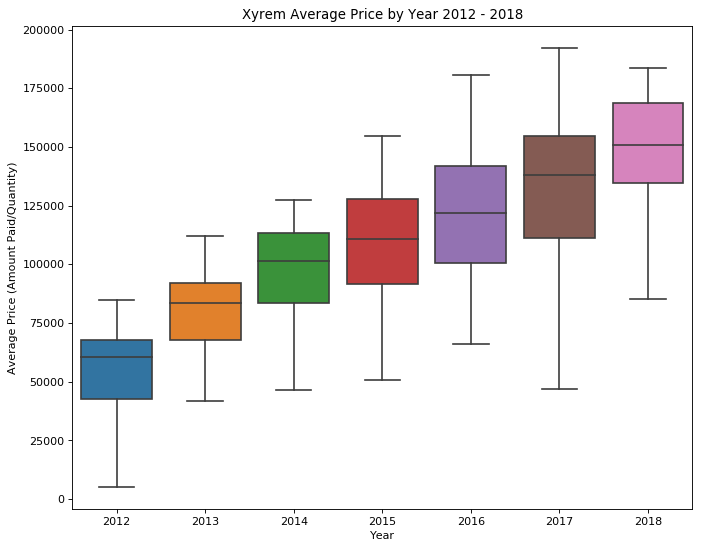

In [230]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=xyrem.AVG, x=xyrem.FROM_YEAR,showfliers=False)
plt.xlabel('Year')
plt.ylabel('Average Price (Amount Paid/Quantity)')
plt.title('Xyrem Average Price by Year 2012 - 2018')
plt.show()

# Remicade Review 

In [231]:
remicade = ssb[ssb.NDC_PROD_NAME.str.contains('REMICADE')]

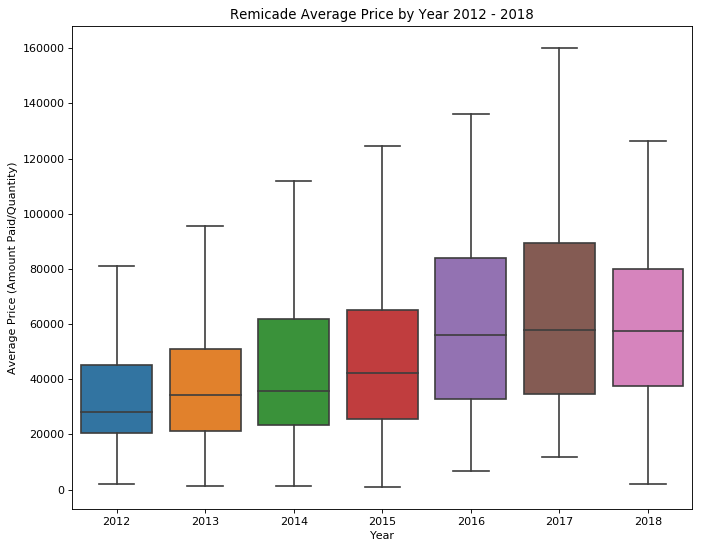

In [232]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=remicade.AVG, x=remicade.FROM_YEAR,showfliers=False)
plt.xlabel('Year')
plt.ylabel('Average Price (Amount Paid/Quantity)')
plt.title('Remicade Average Price by Year 2012 - 2018')
plt.show()

In [233]:
print(ssb.NDC_PROD_NAME[ssb.AMT_PAID==max(ssb.AMT_PAID)])

1824994    ABILIFY MAINTENA                              ...
Name: NDC_PROD_NAME, dtype: object


In [32]:
abilify = ssb[ssb.NDC_PROD_NAME.str.contains('ABILIFY')]

In [33]:
abilify.head()

,COVERAGE_CLASS,FROM_YEAR,CLAIM_ID_KEY,SV_LINE,SV_STAT,AGE,SEX,MEMBER_COUNTY,MEMBER_STATE,PHARMACY_COUNTY,...,BRAND_STATUS,RX_DAYS_SUPPLY,RX_INGR_COST,RX_DISP_FEE,RX_DAW,RX_REFILLS,COMPOUND,CLAIM_STATUS_ORIG,IMPUTED_SERVICE_KEY,AVG
35930,PHM,2018,106492424,1.0,P,25,M,999,MA,NaN,...,SSB,30.0,2309.82,1.64,0,3.0,N,1,2018_9331592,2011.460000
35931,PHM,2018,101561632,1.0,P,25,M,999,MA,NaN,...,SSB,30.0,2309.82,1.64,0,3.0,N,1,2018_9331592,2011.460000
37053,PHM,2018,104508765,1.0,P,25,M,999,MA,NaN,...,SSB,30.0,2206.14,1.64,0,1.0,N,1,2018_6456928,1907.780000
42136,PHM,2018,81690116,1.0,P,45,M,999,MS,NaN,...,SSB,28.0,2073.30,0.90,0,5.0,N,1,2018_1393480,593.025000
42308,PHM,2018,322280154,1.0,P,56,M,999,RI,NaN,...,SSB,28.0,2111.04,1.49,0,0.0,N,1,2018_4009487,1406.282143


In [234]:
humgroup = humirapen.groupby('FROM_YEAR')['AVG'].median().reset_index()
humgroup['increase']=humgroup['AVG']/humgroup['AVG'][0]-1

stelgroup = stelara.groupby('FROM_YEAR')['AVG'].median().reset_index()
stelgroup['increase']=stelgroup['AVG']/stelgroup['AVG'][0]-1

xygroup = xyrem.groupby('FROM_YEAR')['AVG'].median().reset_index()
xygroup['increase']=xygroup['AVG']/xygroup['AVG'][0]-1

remgroup = remicade.groupby('FROM_YEAR')['AVG'].median().reset_index()
remgroup['increase']=remgroup['AVG']/remgroup['AVG'][0]-1

ssbgroup = ssb.groupby('FROM_YEAR')['AVG'].median().reset_index()
ssbgroup['increase']=ssbgroup['AVG']/ssbgroup['AVG'][0]-1

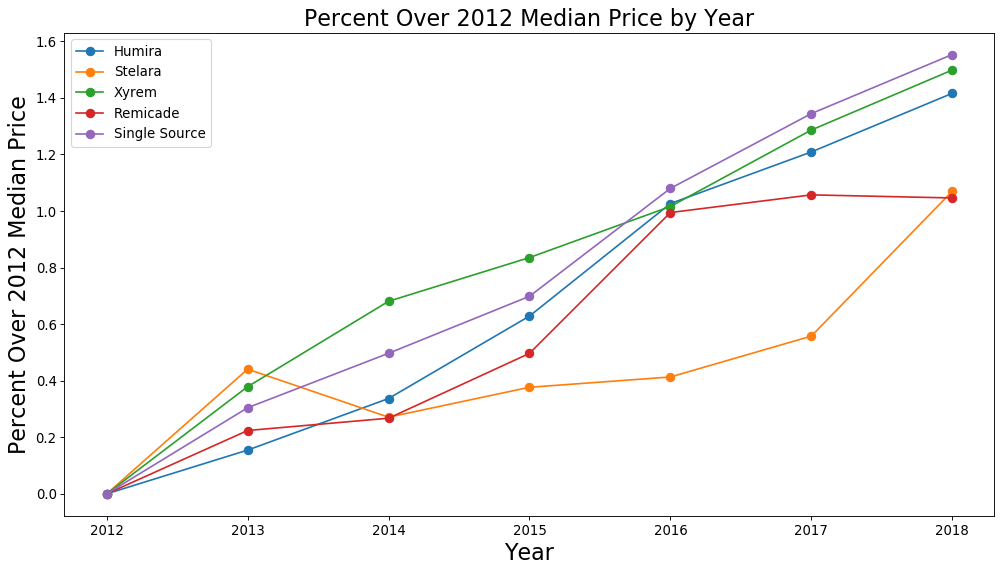

In [235]:

figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('FROM_YEAR', 'increase',data=humgroup, marker ='.', markersize = 15, label='Humira')
plt.plot('FROM_YEAR', 'increase',data=stelgroup, marker='.', markersize = 15, label = 'Stelara')
plt.plot('FROM_YEAR', 'increase',data=xygroup, marker='.', markersize = 15, label= 'Xyrem')
plt.plot('FROM_YEAR', 'increase',data=remgroup, marker='.', markersize = 15, label= 'Remicade')
plt.plot('FROM_YEAR', 'increase',data=ssbgroup, marker='.', markersize = 15, label= 'Single Source')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Percent Over 2012 Median Price by Year', fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Percent Over 2012 Median Price',fontsize=20)
plt.legend(fontsize=12)
plt.show()


In [236]:
msb = pd.read_csv('msb.csv')

In [237]:
msb['AVG']=msb['AMT_PAID']/msb['RX_DAYS_SUPPLY']*365

In [238]:
msbgroup = msb.groupby('FROM_YEAR')['AVG'].median().reset_index()
msbgroup['increase']=msbgroup['AVG']/msbgroup['AVG'][0]-1

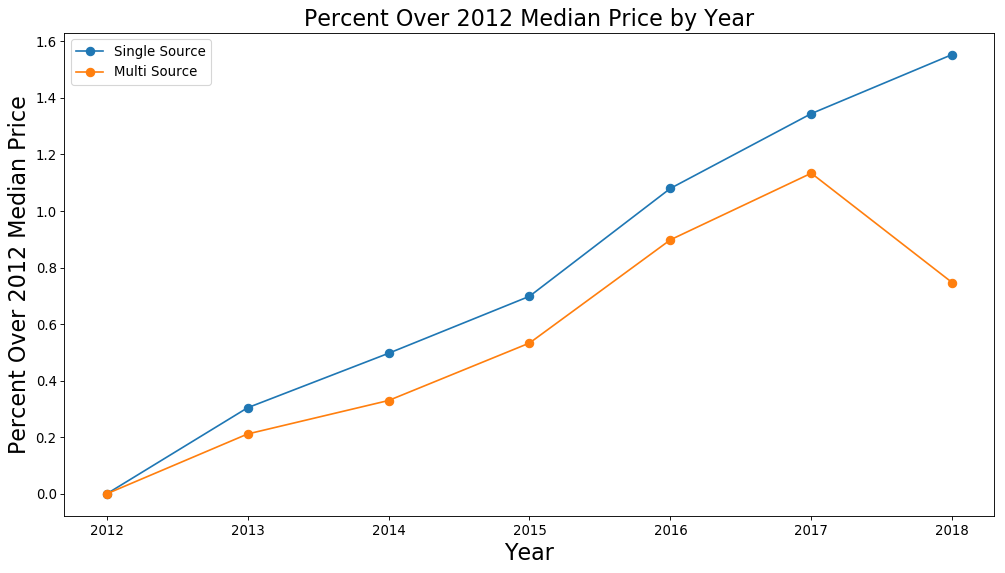

In [239]:
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('FROM_YEAR', 'increase',data=ssbgroup, marker ='.', markersize = 15, label='Single Source')
plt.plot('FROM_YEAR', 'increase',data=msbgroup, marker='.', markersize = 15, label = 'Multi Source')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Percent Over 2012 Median Price by Year', fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Percent Over 2012 Median Price',fontsize=20)
plt.legend(fontsize=12)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


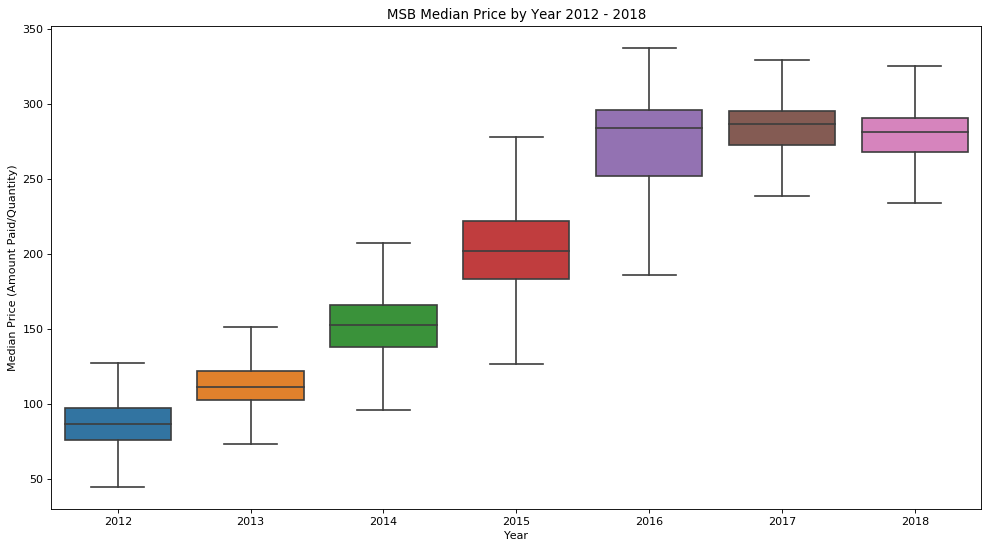

In [240]:
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
epipen = msb[msb.NDC_PROD_NAME.str.contains('EPIPEN')]
epipen['AVG']=epipen['AMT_PAID']/epipen['QTY']
sns.boxplot(y=epipen.AVG, x=epipen.FROM_YEAR,showfliers=False)
plt.xlabel('Year')
plt.ylabel('Median Price (Amount Paid/Quantity)')
plt.title('MSB Median Price by Year 2012 - 2018')
plt.show()

In [241]:
gen = pd.read_csv('generic.csv')

In [242]:
gen['AVG']=gen['AMT_PAID']/gen['RX_DAYS_SUPPLY']*365

In [243]:
gengroup = gen.groupby('FROM_YEAR')['AVG'].median().reset_index()
gengroup['increase']=gengroup['AVG']/gengroup['AVG'][0]-1

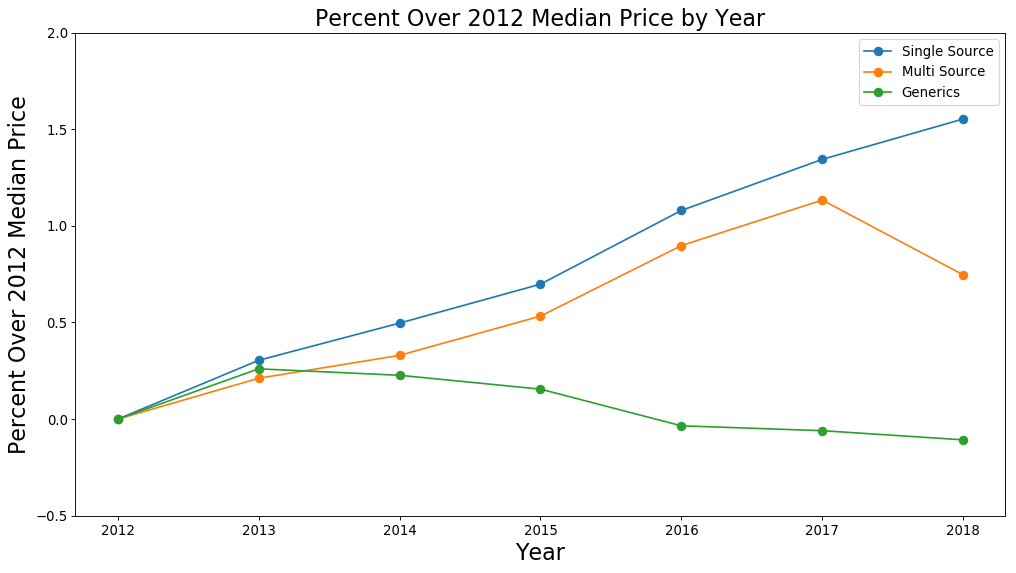

In [315]:
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('FROM_YEAR', 'increase',data=ssbgroup, marker ='.', markersize = 15, label='Single Source')
plt.plot('FROM_YEAR', 'increase',data=msbgroup, marker='.', markersize = 15, label = 'Multi Source')
plt.plot('FROM_YEAR', 'increase',data=gengroup, marker='.', markersize = 15, label = 'Generics')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Percent Over 2012 Median Price by Year', fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Percent Over 2012 Median Price',fontsize=20)
plt.ylim(-.5,2)
plt.legend(fontsize=12)
plt.show()

In [319]:
ssbage = ssb.groupby('AGE')['AMT_PAID'].sum().reset_index()
ssbage.AMT_PAID=ssbage.AMT_PAID/1000000
ssbage.AGE = ssbage[ssbage.AGE!='90+']
ssbage.replace(np.nan,'91')
ssbage
#ssbage.AGE.astype(int)
#ssbage.sort_values(by=['AGE'])

,AGE,AMT_PAID
0,0,3.388113
1,1,3.849013
2,10,12.685297
3,11,12.281869
4,12,15.661580
5,13,20.035735
6,14,22.580682
7,15,21.833680
8,16,20.488386
9,17,18.466714
